# Kaggle Competition: Titanic 

 Objective: To predict survival of passengers on the Titanic. 

Purpose: To find out what factors influenced the survival of a passenger or a group of passengers and figure out proper ways to fill missing values.

Available data: Various details about 418 passengers(whose survival had to be predicted) + 891 other passengers whose survival was listed(either 0 or 1). There were around 900 crew on the ship, whose data was not provided. Approximately 1317 passengers were on the ship, the train and test datasets add up to 1309 passengers.

We will do a walkthrough of various approaches to going about this problem. 

Steps:

1) Get the data

2) Explore and find trends

3) Fill missing values using insights from exploration

4) Feature engineering

5) Create and select model

Before getting the data, lets import the necessary packages.

In [1]:
# For dataframes and arrays
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns # this is awesome
%matplotlib inline
sns.set(style = 'ticks')

In [3]:
# Navigate to the folder containing the data

In [3]:
import os
os.chdir('E:')

In [4]:
cd projects/datasets/titanic

E:\projects\datasets\titanic


In [192]:
X = pd.read_csv('train.csv', header = 0, index_col = 0)
X.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [193]:
test = pd.read_csv('test.csv', index_col = 0, header = 0)
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## Quick Look

In [8]:
X.shape, test.shape

((891, 11), (418, 10))

In [53]:
X.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
X.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [15]:
X.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [129]:
for col in X.columns:
    print(col, '\f', len(X[col].unique()))

Survived  2
Pclass  3
Name  891
Sex  2
Age  89
SibSp  7
Parch  7
Ticket  681
Fare  248
Cabin  148
Embarked  4


In [131]:
for col in test.columns:
    print(col, '\f', len(test[col].unique()))

Pclass  3
Name  418
Sex  2
Age  80
SibSp  7
Parch  8
Ticket  363
Fare  170
Cabin  77
Embarked  3


# Women and Children First

Lets see if the features sex and age factor into the survival.

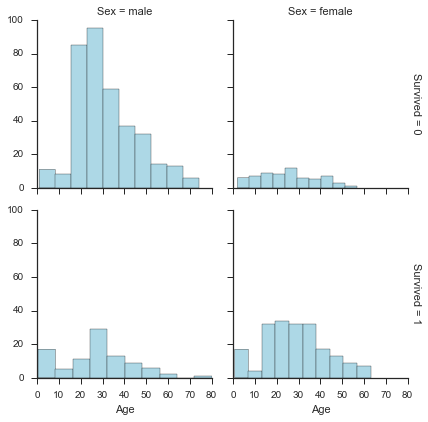

In [25]:
# histogram of Sex and Age split by Survival
g = sns.FacetGrid(X, col="Sex", row="Survived", margin_titles=True) 
g.map(plt.hist,"Age",color="lightblue")
plt.show()

In [73]:
len(X[X.Sex == 'male'])
# 891 - 577 = 314 women

577

In [41]:
# Relationship between Sex and Survived
X[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Men are much more in number compared to women but looking at the FacetGrid and the above grouped table, we can see that women were much more in density among those who survived(close to 3/4ths) and more than 80% of the men perished.

More exploration by adding Pclass to Age, Sex and Survival features:

In [8]:
X[['Age', 'Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [44]:
# Age against Pclass grouped by Sex
pd.pivot_table(X, values = 'Age', index = 'Pclass', columns = 'Sex', aggfunc = 'mean')

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [7]:
# Pclass vs Survived
X[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Older people understandably are more in Pclass 1 than in 2 or 3. Older -> richer -> costlier Pclass.

Richer -> closer to the important people on the ship management -> had more time/better chances to plan their survival than the poor ones in Pclasses 2 and 3. Hence the decline in Survival rate with Pclass.

Also, Classes 2 and 3 consisted of people mostly in their twenties.

Moving on to quick groupings of other features such as Parch(Number of parents/children) and SibSp(Siblings/Spouse):

In [49]:
X[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [50]:
X[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Since there are quite a few values(6 & 8) these two variables can take, its a good idea to not trust the numbers and go ahead with plots instead. There could be very low samples pertaining to a certain value which would not be helpful in generalizing.

Plotting SibSp and Parch against Survival and age:

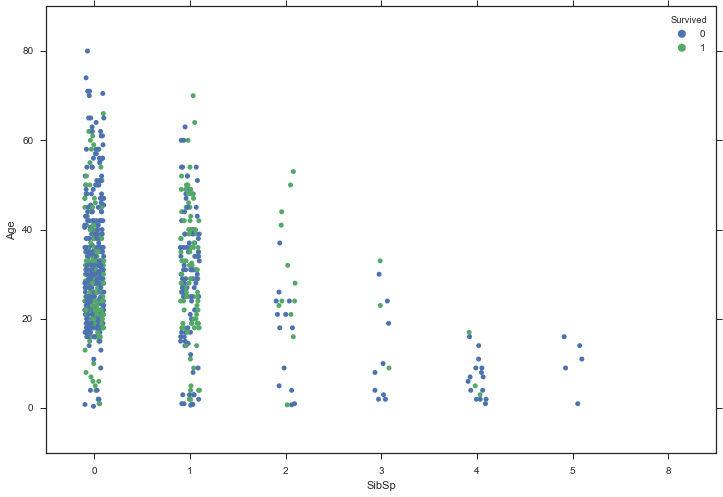

In [7]:
plt.figure(figsize = (12,8))
sns.stripplot(x="SibSp", y="Age", hue="Survived", data=X, jitter=True)
plt.show()

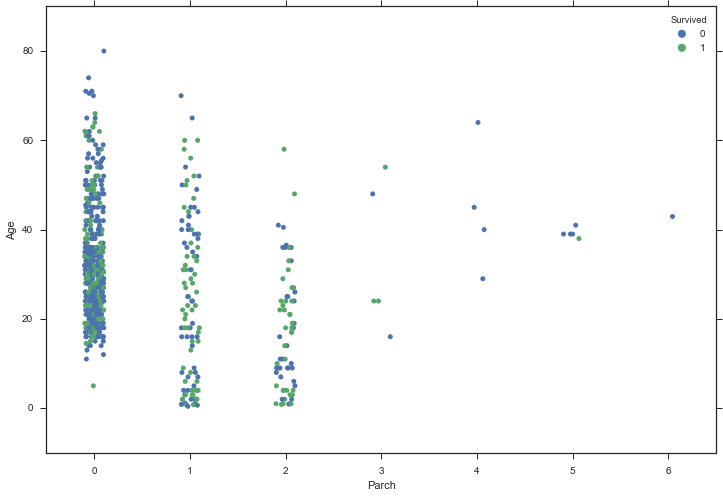

In [38]:
plt.figure(figsize = (12,8))
sns.stripplot(x="Parch", y="Age", hue="Survived", data=X, jitter=True)
plt.show()

In [63]:
X.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

Pclass and Fare seem to have the highest dependence with survival. 

Lets move on to imputing missing values to make the data viable for training machine learning models.

### Embarked

In [68]:
X[X['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [76]:
#X[(X.Fare == 80) & (X.Cabin == 'B28')]
X[X.Cabin == 'B28']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


It appears that these two women are the only ones who paid a fare of 80 and belong to the cabin B28, Pclass 1. Plots to the rescue:

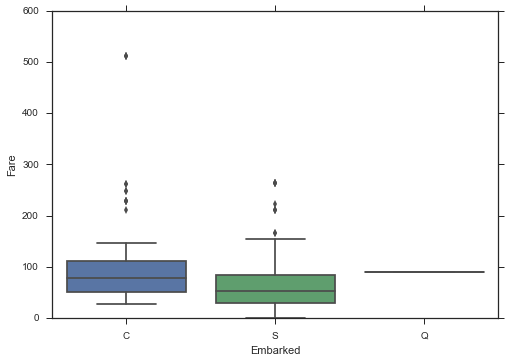

In [8]:
sns.boxplot(x = 'Embarked', y = 'Fare', data = X[(X.Pclass == 1)])

Among those in Pclass 1, those who embarked at C(Cherbourg) appear to have a mean of 80. Going ahead:

In [194]:
X['Embarked'] = X.Embarked.fillna('C')

In [195]:
# What next?
X.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [196]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Fare in Test

In [12]:
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [197]:
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
    df['Fare'] = df['Fare'].fillna(median_fare)
    return df

test = fill_missing_fare(test)

Before filling the age feature, since we opted to use Random forests to predict it, we'll work a little bit more on feature engineering to make those predictions better.

### Cleaning the Cabin

In [198]:
# get the deck on the ship the passenger is in
X['Deck'] = X.Cabin.str[0]
test['Deck'] = test.Cabin.str[0]
X.Deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

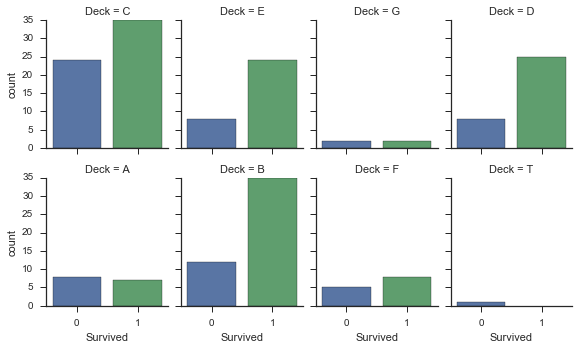

In [62]:
sns.factorplot('Survived', col='Deck', col_wrap = 4, data=X[X.Deck.notnull()], kind='count', size=2.5, aspect=.8)

In [199]:
X.Deck.fillna('Z', inplace=True) # for null values
test.Deck.fillna('Z', inplace=True)
X["Deck"].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### Adding Siblings, Spouses, Parents and Children to get family size

A lot skeptical regarding this move. For example, in a family of size 5, each of them will have the same value of 5 for the new feature familysize and its not entirely possible that they all might've survived(or they all might've perished together). Similarly all other families with different sizes. Having this feature does not help in differentiating between the possibility of survival among individual members of a family although it might assign a aggregate survival probability to disparate families. We will take the help of predictions to see if we want this feature or not.

In [200]:
# get family size
X['Familysize'] = X['SibSp'] + X['Parch'] + 1
test['Familysize'] = test['SibSp'] + test['Parch'] + 1

### Getting Titles from Names

In [201]:
# Extract titles
X.Name.head()

X['Title'] = X['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

a = dict(X.Title.value_counts())

def clean_titles(t):
    if a[t] < 40:
        return 'Rare'
    else:
        return t

X['Title'] = X.Title.apply(clean_titles)

In [202]:
test['Name'].head()

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [203]:
test['Title'] = test['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [204]:
b = dict(test.Title.value_counts())
# b, X.Title.unique() --- see if the major titles in train are present in test also -- go ahead with adding 'rare'
def clean_titles_test(t):
    if b[t] < 20:
        return 'Rare'
    else:
        return t
test['Title'] = test.Title.apply(clean_titles_test)

In [205]:
X.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

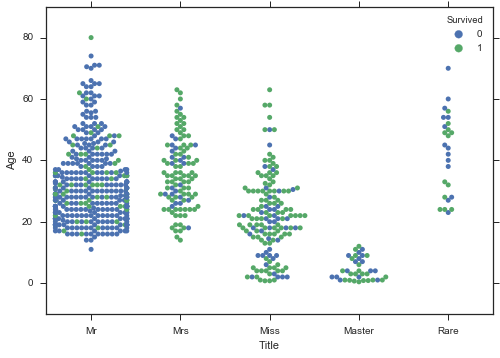

In [22]:
sns.swarmplot(x="Title", y="Age", hue="Survived", data=X)

In [24]:
X[['Title', 'Survived']].groupby('Title', as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.444444


[medium, long, short, very long]
Categories (4, object): [short < medium < long < very long]


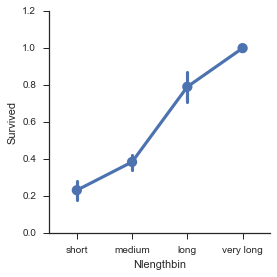

In [206]:
# Tackling Names and length of names
X['NameLength'] = X['Name'].apply(lambda x: len(x))

test['NameLength'] = test['Name'].apply(lambda x: len(x))
# get an idea of what the bins should be through value_counts
# X.NameLength.value_counts()

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'medium', 'long', 'very long']

X['Nlengthbin'] = pd.cut(X['NameLength'], bins, labels=group_names)
test['Nlengthbin'] = pd.cut(test['NameLength'], bins, labels=group_names)

sns.factorplot(x="Nlengthbin", y="Survived", data=X)
print(X["Nlengthbin"].unique())


So it appears to be a good idea to work with the length of the Name. The longer the names, the richer in heritage, or something like that, richer and more familiar with the management of the ship etc.. you get the idea.

Lets delete the columns that we do not need further viz., Name(title has been extracted), SibSp + Parch(combined to form Familysize), NameLength(bins have been created) and Ticket too.

In [207]:
cols = ['Name', 'SibSp', 'Parch', 'Cabin', 'Familysize', 'NameLength', 'Ticket']
for col in cols:
    del X[col]

In [208]:
(X.dtypes)

Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Deck            object
Title           object
Nlengthbin    category
dtype: object

In [209]:
cols = ['Name', 'SibSp', 'Parch', 'Cabin', 'Familysize', 'NameLength', 'Ticket']
for col in cols:
    del test[col]

In [210]:
(test.dtypes)

Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Deck            object
Title           object
Nlengthbin    category
dtype: object

In [211]:
len(X.columns), len(test.columns)

(9, 8)

Lets convert Categorical variables into Numerical ones and proceed to predicting Age feature.

In [212]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_vars = ['Sex', 'Title', 'Nlengthbin', 'Deck', 'Embarked']
for col in cat_vars:
    X[col]= le.fit_transform(X[col])
    test[col]= le.fit_transform(test[col])

X.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Nlengthbin
PassengerId,,,,,,,,,
1,0,3,1,22.0,7.2500,2,8,2,1
2,1,1,0,38.0,71.2833,0,2,3,0
3,1,3,0,26.0,7.9250,2,8,1,1
4,1,1,0,35.0,53.1000,2,2,3,0
5,0,3,1,35.0,8.0500,2,8,2,1


Plotting Age distribution:

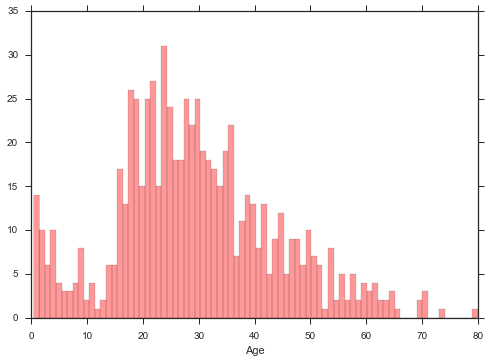

In [125]:
sns.distplot(X["Age"].dropna(), bins=80, kde = False, color="red")

In [213]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age', 'Embarked', 'Fare', 'Title', 'Pclass', 'Deck', 'Nlengthbin', 'Sex']]
    # Split sets into train and test
    train  = age_df.loc[df.Age.notnull()] # known Age values
    test = age_df.loc[df.Age.isnull()] # null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[df.Age.isnull(), 'Age'] = predictedAges 
    
    return df

In [214]:
X = fill_missing_age(X)
test = fill_missing_age(test)

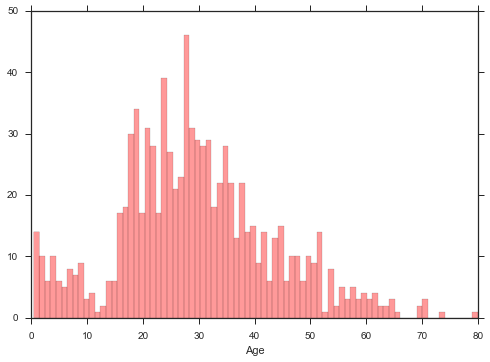

In [169]:
sns.distplot(X["Age"].dropna(), bins=80, kde = False, color="red")
# Age distribution after filling missing values

In [215]:
X.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Deck          0
Title         0
Nlengthbin    0
dtype: int64

In [216]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Deck          0
Title         0
Nlengthbin    0
dtype: int64

No more missing values! We will resort to other ways of imputing missing Age values if the accuracy of the model is not satisfactory.

## Predictions

In [217]:
y = X['Survived']
del X['Survived']

In [218]:
test_submit = pd.read_csv('test.csv', header = 0)

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
model = RandomForestClassifier(n_estimators=700,min_samples_leaf=3)

In [221]:
model.fit(X, y)
model.score(X, y)

0.89674523007856344

In [222]:
from sklearn.cross_validation import train_test_split

In [223]:
train_X , valid_X , train_y , valid_y = train_test_split( X , y , train_size = .7 )

In [224]:
model.fit(train_X, train_y)
model.score(train_X, train_y)

0.8956661316211878

In [225]:
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.895666131621 0.794776119403


In [226]:
y_test = model.predict(test)
passenger_id = test_submit.PassengerId
submit_rfc = pd.DataFrame({'PassengerId': passenger_id, 'Survived': y_test})

In [227]:
submit_rfc.to_csv('titanic_pred.csv', index = False)

Obtained a public score of 0.77990. Will work more and update as I find ways to better model the data and build accuracy.